In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as plticker

In [2]:
users = ['Anhad', 'Nishant', 'Tiwari', 'Merchant', 'Sharma']

In [3]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')

#df = pd.read_csv(infile, parse_dates=['datetime'], date_parser=dateparse)
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1TgChdOy1D_EEy4Apc8ybjfZoI9waaF2_nBbyxsHtV9s/export?format=csv&gid=2027974951', parse_dates=['DATE'], date_parser=dateparse)

# Discard rows for matches that haven't been played yet.
df = df.dropna(subset=['Final Score'])
df

,DATE,FIXTURE,Final Score,Anhad,Nishant,Tiwari,Merchant,Sharma
10,2017-08-19,Bournemouth V Watford,0-2,2-3,1-2,1-2,2-0,2-1
11,2017-08-19,Burnley V West Bromwich Albion,0-1,2-1,2-1,1-1,1-1,2-1
12,2017-08-19,Huddersfield Town V Newcastle United,1-0,1-2,1-0,1-2,1-2,0-1
13,2017-08-19,Leicester City V Brighton & Hove Albion,2-0,3-1,3-2,2-0,3-0,2-2
14,2017-08-19,Liverpool V Crystal Palace,1-0,3-1,2-1,3-1,3-0,2-0
15,2017-08-19,Manchester City V Everton,1-1,2-0,1-0,2-0,3-2,2-0
16,2017-08-19,Southampton V West Ham United,3-2,0-1,1-2,1-2,1-1,1-1
17,2017-08-19,Stoke City V Arsenal,1-0,1-2,1-2,1-3,0-2,1-3
18,2017-08-19,Swansea City V Manchester United,0-4,0-2,0-3,0-3,0-4,0-2
19,2017-08-19,Tottenham Hotspur V Chelsea,1-2,3-1,2-1,2-0,1-2,2-3


In [4]:
# Function to compute points, given scores in text.
def points(actual_score, user_score):
    # CLEANUP: Debug
    #print('Actual Score:',actual_score, type(actual_score))
    #print('User Score:', user_score, type(user_score))
    if pd.isnull(user_score) or pd.isnull(actual_score):
        return 0

    points = 0
    
    ac = [int(x) for x in actual_score.split('-')]
    uc = [int(x) for x in user_score.split('-')]

    if actual_score == user_score:
        points = 3
    else:
        ac_ = ac[0] - ac[1]
        uc_ = uc[0] - uc[1]

        if (ac_  > 0 and uc_ > 0) or (ac_ < 0 and uc_ < 0) or (ac_ == uc_ == 0):
            points = 1

    # Additional Point for correctly predicting a draw
    if points > 0 and ac[0] == ac[1]:
        points += 1
    #print('Points:', points)
    return points

In [5]:
# Compute points for all Users

# Take a row as a series, modify it and return it (we don't want to reduce dimensionality)
def f(x, name=None):
    x[name] = points(x['Final Score'], x[name])
    #print(x)
    return x

print(df.shape)
# Keep a copy of the original incase we need it.
df2 = df.copy()

for u in users:
    df = df.apply(f, axis=1, name=u)

df

(259, 8)


,DATE,FIXTURE,Final Score,Anhad,Nishant,Tiwari,Merchant,Sharma
10,2017-08-19,Bournemouth V Watford,0-2,1,1,1,0,0
11,2017-08-19,Burnley V West Bromwich Albion,0-1,0,0,0,0,0
12,2017-08-19,Huddersfield Town V Newcastle United,1-0,0,3,0,0,0
13,2017-08-19,Leicester City V Brighton & Hove Albion,2-0,1,1,3,1,0
14,2017-08-19,Liverpool V Crystal Palace,1-0,1,1,1,1,1
15,2017-08-19,Manchester City V Everton,1-1,0,0,0,0,0
16,2017-08-19,Southampton V West Ham United,3-2,0,0,0,0,0
17,2017-08-19,Stoke City V Arsenal,1-0,0,0,0,0,0
18,2017-08-19,Swansea City V Manchester United,0-4,1,1,1,3,1
19,2017-08-19,Tottenham Hotspur V Chelsea,1-2,0,0,0,3,1


In [6]:
# Totals
for u in users:
    print('{user:<10}: {score:>3}'.format(user=u, score=df[u].sum()))

Anhad     :  99
Nishant   : 209
Tiwari    : 190
Merchant  : 193
Sharma    : 101


In [7]:
# Golden Finger: Maximum Number of 'Exacts'
for u in users:
    print('{user:<10}: {score:>3}'.format(user=u, score=df[df[u] >= 3][u].count()))

Anhad     :  10
Nishant   :  27
Tiwari    :  25
Merchant  :  26
Sharma    :  10


In [8]:
# Use a matplotlib theme tailored to ipython notebooks.
mpl.style.use('seaborn-notebook')

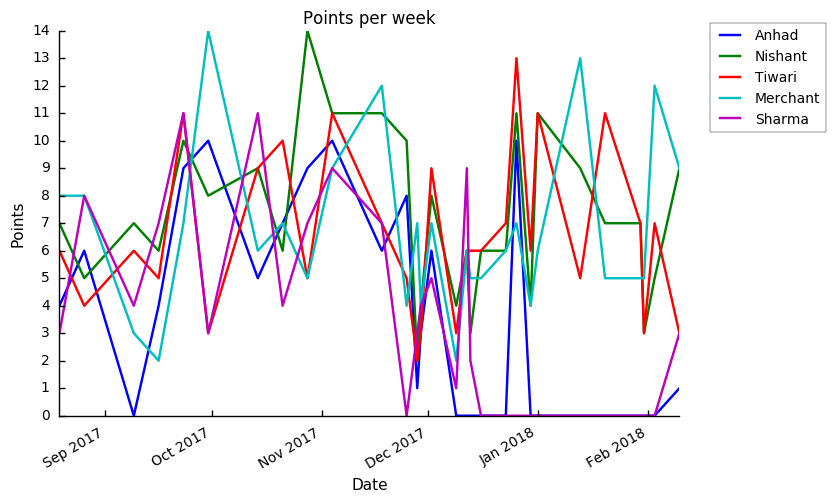

In [9]:


# Graph scores by week

# First we filter the dataframe, to keep only the date and user columns
# We then we group rows by date (This groups all matches on a matchday)
grouped = df[['DATE'] + users ].groupby('DATE')

# We then calculate aggregate scores per matchday
x = grouped.aggregate(np.sum)

# Convert the 'Date' field to an actual datetime object
x.index = pd.to_datetime(x.index)

# Plot the figure
plt.figure()

# Generate the matplotlib figure object

# Tried keeping the colors the same as the ones in the spreadsheet, but that makes the plot hard to read
#graph = x.plot(color=['green','blue','purple', 'violet', 'maroon'])
graph = x.plot()

# Specify axes and figure label
graph.set_xlabel('Date')
graph.set_ylabel('Points')
graph.set_title('Points per week')

# Add some flash
graph.legend(bbox_to_anchor=(1.05,1.02), loc='upper left', borderaxespad=0.)
graph.spines['right'].set_visible(False)
graph.spines['top'].set_visible(False)
graph.tick_params(right='off', top='off')
graph.set_ylim(ymin=0)
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
graph.yaxis.set_major_locator(loc)

# render
plt.show()

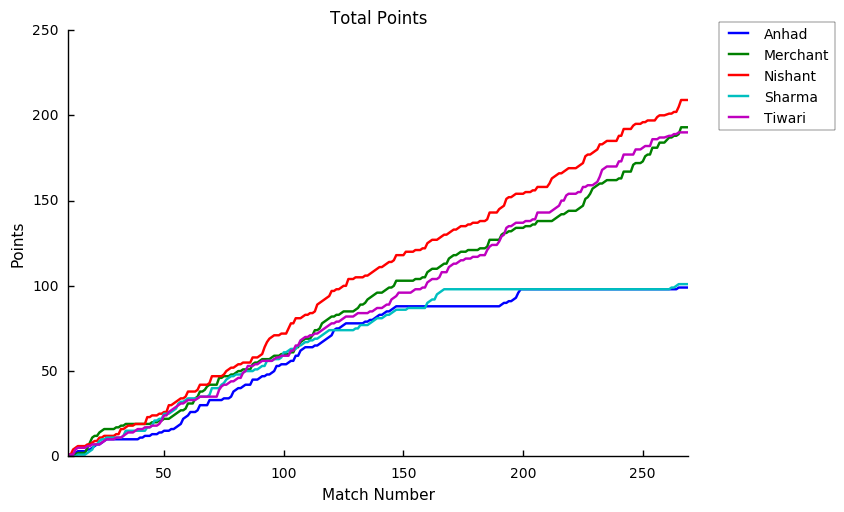

In [10]:
# Cumulative points tally


# Compute Cumulative Totals assuming NaN == 0
y = grouped.fillna(0).cumsum()

# Plot the figure
plt.figure()

# Generate the matplotlib figure object
graph = y.plot()

# Set labels and Titles
graph.set_xlabel('Match Number')
graph.set_ylabel('Points')
graph.set_title('Total Points')

# Add some flash
graph.legend(bbox_to_anchor=(1.05,1.02), loc='upper left', borderaxespad=0.)
graph.spines['right'].set_visible(False)
graph.spines['top'].set_visible(False)
graph.tick_params(right='off', top='off')
graph.set_ylim(ymin=0)

# render
plt.show()